In [1]:
from datetime import datetime as dt
from glob import glob as glob
import torch as tr
import numpy as np
import itertools

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size':22})

%load_ext autoreload
%reload_ext autoreload
%autoreload 2


In [2]:
class Net(tr.nn.Module):
  def __init__(self,edim,hdim):
    super().__init__()
    nonlin = tr.nn.Tanh
    self.in2hid = tr.nn.Linear(edim,hdim) 
    self.inact = nonlin()
    self.hid2out = tr.nn.Linear(hdim,edim,bias=False) 
    
  def forward(self,xbatch):
    hid = self.in2hid(xbatch)
    hid = self.inact(hid)
    out = self.hid2out(hid)
    return out

In [3]:
edim = 50
hdim = 20
batch = 3

net = Net(edim,hdim)
lossop = tr.nn.MSELoss()
optiop = tr.optim.Adam(net.parameters(), lr=0.001)

In [4]:
nepochs=100000
loss_arr = -np.zeros([nepochs])
emat = tr.randn(batch,edim)
ep_loss = 0
for ep in range(nepochs):
  # randomize emat
  if ep_loss<.1:
    emat = tr.randn(batch,edim)
  # train loop
  ep_loss = 0
  for tstep in range(batch):
    ## fp
    xbatch = ytarget = emat[tstep]
    yhat = net(xbatch)
    ## bp
    loss = lossop(yhat,ytarget)
    # record
    ep_loss += loss.item()
    # optimize
    optiop.zero_grad()
    loss.backward()
    optiop.step()
  loss_arr[ep] = ep_loss
  


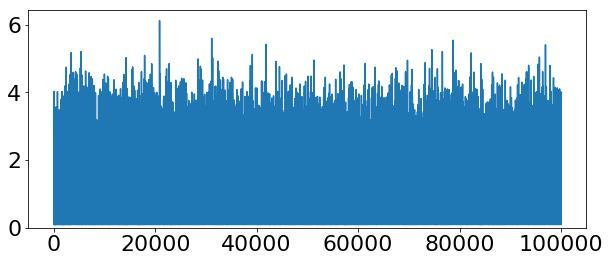

In [5]:
plt.figure(figsize=(10,4))
plt.plot(loss_arr)
plt.ylim(0)
plt.savefig('autoenc_exp-edim%i-hdim%i'%(edim,hdim))